# 01 **분류(Classification)의 개요**

분류는 다양한 머신러닝 알고리즘으로 구성되어 있다.
- 베이즈(Bayes) 통계와 생성 모델에 기반한 **나이브 베이즈**(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀**(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 **결정 트리**(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신**(Support Vector Machine)
- 근접 거리를 기준으로 하는 **최소 근접**(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 **신경망**(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블**(Ensemble)

앙상블은 서로 다른/같은 알고리즘을 단순히 결하한 형태도 있지만 일반적으로는 배깅과 부스팅 방식으로 나뉜다.

배깅 방식의 대표인 **랜덤 포레스트**는 뛰어난 예측 성능, 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘이다.

하지만 요즘 대세는 부스팅 방식. 
- 부스팅의 효시라고 할 수 있는 **그래디언트 부스팅**의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸려 최적화가 어려웠다.
- 하지만 **XgBoost**와 **LightGBM** 등 기존 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘을 계속 등장하며 주류로 자리매김했다.

앙상블은 서로 다른/같은 알고리즘을 결합한다고 했는데, 대부분 동일한 알고리즘을 결합한다.
- 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리.

결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘이다.
- 데이터 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다.
- 하지만 복잡한 규칙 구조를 가져야 하고, 이로 인한 과적합이 발생해 반대로 예측 성능이 저하될 수도 있다.

하지만 **이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용한다**.
- 앙상블은 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문이다.

# 02 **결정 트리**

결정 트리는 데이터에 있는 규칙을 <u>학습을 통해 자동으로 찾아내</u> 트리 기반의 분류 규칙을 만드는 것.

데이터셋에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다.
- 규칙이 많을수록, 트리 깊이가 깊어질수록 예측 성능이 저하될 가능성이 높다.

가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 최대한 많은 데이터셋이 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다.
- 이를 위해선 최대한 **균일한 데이터셋**을 구성할 수 있도록 분할하는 것이 중요하다.

데이터셋의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
- 모두 검은 공으로 채워진 바구니에서 공을 하나 뽑았을 때 그 공이 검은색이라고 쉽게 예측할 수 있다.
- 하지만 바구니 속 공의 종류가 다양하다면 뽑은 공이 무슨 색이라 단언하기 어렵다.

결정 노드는 정보 균일도가 높은 데이터셋을 먼저 선택할 수 있도록 규칙 조건을 만든다.
- 정보 균일도가 데이터셋으로 쪼개질 수 있도록 조건을 찾아 서브 데이터셋을 만들고, 다시 이 서브 데이터셋에서 균일도가 높은 자식 데이터셋으로 쪼개는 방식으로 데이터 값을 예측한다.

예를 들어 박스 안에 30개의 레고 블록이 있고, '형태'는 원, 네모, 세모, '색깔'은 노랑, 빨강, 파랑이 있다.
- 이 중 노랑색 블록의 경우 모두 동그라미로 구성되었다 할 때, 첫 번째로 만들어져야 할 조건은 `if '색깔' == '노란색'`이다.
- 왜냐면 모든 노란 블록이면 모두 동그라미라 예측할 수 있고, 그 다음 나머지 블록에 대해 다시 균일도 조건을 찾는게 효율적이기 때문이다.

정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(information gain) 지수와 지니 계수가 있다.


- **정보 이득**은 엔트로피라는 개념을 기반으로 한다. 결정 트리는 정보 이득이 높은 속성을 기준으로 분할한다.
  - 엔트로피는 주어진 데이터 집합의 혼잡도를 의미한다. 같은 값이 섞여 있으면 엔트로피가 낮다.
  - 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. `1-엔트로피 지수`.

- **지니 계수**는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수다. 0이 가장 평등하고 1로 갈수록 불평등하다.
  - 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

**정리**
- 정보 이득 지수는 <u>높을수록</u>, 지니 계수는 <u>낮을수록</u> 기준이 된다.

`DecisionTreeClassifier`는 기본으로 지니 계수를 이용해 데이터셋을 분할한다.
- 결정 트리의 일반적인 알고리즘은 정보 이득이 높거나 지니계수가 낮은 조건을 찾아 반복적으로 분할한 뒤, 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

### **결정 트리 모델의 특징**

결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적이다.
- 시각화로 표현까지 할 수 있다.
- 정보의 균일도 이외에 피처 스케일링이나 정규화 같은 전처리 작업이 필요 없다.

가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다.
- 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없다.

### **결정 트리 파라미터**

사이킷런은 `DecisionTreeClassifier`와 `DecisionTreeRegressor` 클래스를 제공한다.
- 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반이다.

두 클래스 모두 동일한 파라미터를 사용한다.

- `min_samples_split`
  - 노드를 분할하기 위한 최소한의 샘플 데이터 수. 과적합을 제어하는 데 사용된다.
- `min_samples_leaf`
  - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수. 과적합을 제어하는 데 사용된다.
  - 불균형 데이터의 경우 특정 클래스의 데이터가 작을 수 있으므로 이 경우 작게 설정해야 한다.
- `max_features`
  - 최적의 분할을 위해 고려할 최대 피처 개수. Default는 `None`. 데이터셋의 모든 피처를 사용해 분할.
  - int형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트.
  - `'sqrt'`는 $\sqrt{전체\ 피처\ 개수}$만큼 선정.
  - `'auto'`로 지정하면 `'sqrt'`와 동일.
  - `'log'`는 전체 피처 중 $\log_2{(전체\ 피처\ 개수)}$만큼 선정.
  - `'None'`은 전체 피처 선정.
- `max_depth`
  - 트리의 최대 깊이를 규정.
  - Default는 `None`. `None`으로 설정하면 완벽하게 클래스 결정 값이 될 때 까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 `min_samples_split`보다 작아질 때 까지 깊이를 증가시킨다.
  - 깊이가 깊어지면 `min_samples_split` 설정대로 최대 분할해 과적합할 수 있으므로 적절한 값으로 제어가 필요하다.
- `max_leaf_nodes`
  - 말단 노드(Leaf)의 최대 개수.

결정 트리 알고리즘을 제어하는 대부분의 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다.

### **결정 트리 모델의 시각화**

`Graphviz` 패키지를 사용하면 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있다.
- 사이킷런은 `export_graphviz()` API를 제공한다. 
- 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 트리를 시각화해 보여준다.

In [0]:
pip install Graphviz

`Graphviz`를 이용해 붓꽃 데이터셋에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화해보자.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

`export_graphviz()`는 `Graphviz`가 읽어 들여 그래프 형태로 시각화할 수 있는 출력 파일을 생성한다.
- 인자로 (1) 학습이 완료된 estimator, (2) Output 파일명, (3) 결정 클래스의 명칭, (4) 피처의 명칭.

In [0]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성한다.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

이렇게 생성된 출력 파일 'tree.dot'을 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있다.

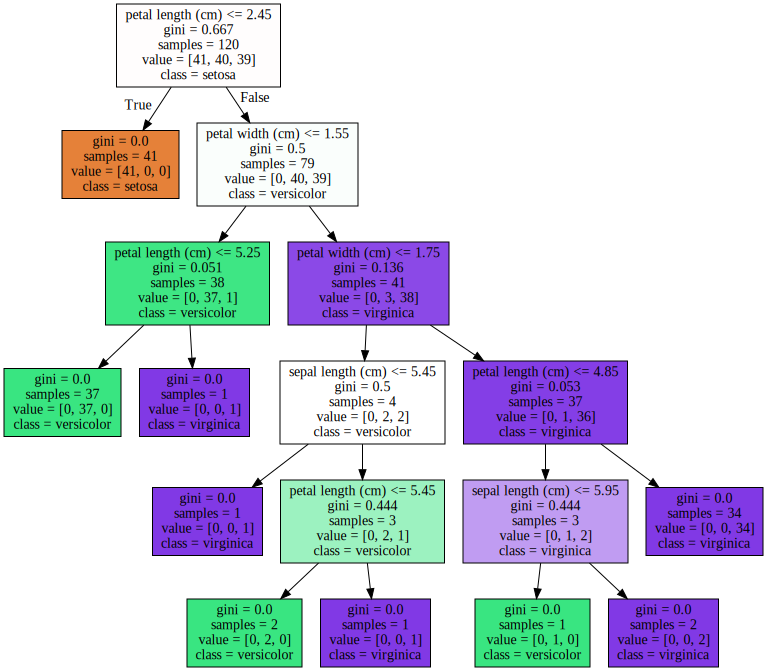

In [0]:
import graphviz 
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다.
- 주황색은 Setosa, 초록색은 Versicolor, 보라색은 Virginica 레이블을 나타낸다.
- 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미.

결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다.
- 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하고, 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있기 때문이다.

사이킷런은 피처의 중요한 역할 지표를 `feature_importances_` 속성으로 제공한다.
- `feature_importances_`는 ndarray 형태로 값을 반환하고 피처 순서대로 값이 할당된다.

붓꽃 데이터셋에서 피처별로 결정 트리 알고리즘에서 중요도를 추출해보자.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


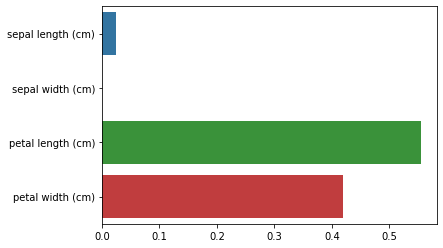

In [0]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{}: {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

`petal_length`가 가장 피처 중요도가 높음을 알 수 있다.

결정 트리는 알고리즘 자체가 직관적이기 때문에 알고리즘과 관련된 요소를 시각적으로 표현할 수 있는 다양한 방안이 있다.

### **결정 트리 과적합(Overfitting)**

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보자.
- 각 피처가 X, Y축으로 나열된 2차원 그래프. X_features와 y_labels 데이터셋을 기반으로 결정 트리를 학습해 보자.

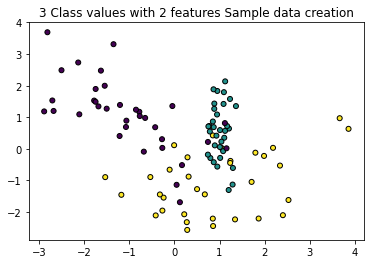

In [0]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 레이블은 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

첫 번째 학습에는 결정 트리의 하이퍼 파라미터를 디폴트로 하고, 켤정 트리 모델이 어떠한 기준을 가지고 분할하며 데이터를 분류하는지 확인해보자.

In [0]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

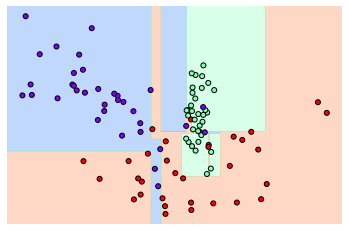

In [0]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치 데이터도 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아지고 복잡해졌다.
- 이런 복잡한 모델은 학습 데이터셋의 특성과 약간만 다른 형태의 데이터셋을 예측하면 예측 정확도가 떨어지게 된다.

이번엔 `min_samples_leaf=6`으로 규칙을 완화해 어떻게 결정 기준 경계가 변하는지 살펴보자.

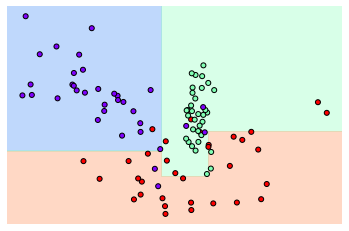

In [0]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

좀 더 일반화된 분류 규칙에 따라 분류된 것 같다.

### **결정 트리 실습 - 사용자 행동 인식 데이터셋**

결정 트리를 이용해 사용자 행동 인식(Human Activity Recognition) 데이터셋에 대한 예측 분류를 수행해 보자.
- 이 데이터셋은 30명에게 스마트폰 센서를 장학한 뒤 사람의 동작과 관련된 여러 피처를 수집한 데이터다.
- 수집된 피처 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측해 보자.

In [0]:
from google.colab import files
files.upload()

Saving features.txt to features.txt


{'features.txt': b'1 tBodyAcc-mean()-X\n2 tBodyAcc-mean()-Y\n3 tBodyAcc-mean()-Z\n4 tBodyAcc-std()-X\n5 tBodyAcc-std()-Y\n6 tBodyAcc-std()-Z\n7 tBodyAcc-mad()-X\n8 tBodyAcc-mad()-Y\n9 tBodyAcc-mad()-Z\n10 tBodyAcc-max()-X\n11 tBodyAcc-max()-Y\n12 tBodyAcc-max()-Z\n13 tBodyAcc-min()-X\n14 tBodyAcc-min()-Y\n15 tBodyAcc-min()-Z\n16 tBodyAcc-sma()\n17 tBodyAcc-energy()-X\n18 tBodyAcc-energy()-Y\n19 tBodyAcc-energy()-Z\n20 tBodyAcc-iqr()-X\n21 tBodyAcc-iqr()-Y\n22 tBodyAcc-iqr()-Z\n23 tBodyAcc-entropy()-X\n24 tBodyAcc-entropy()-Y\n25 tBodyAcc-entropy()-Z\n26 tBodyAcc-arCoeff()-X,1\n27 tBodyAcc-arCoeff()-X,2\n28 tBodyAcc-arCoeff()-X,3\n29 tBodyAcc-arCoeff()-X,4\n30 tBodyAcc-arCoeff()-Y,1\n31 tBodyAcc-arCoeff()-Y,2\n32 tBodyAcc-arCoeff()-Y,3\n33 tBodyAcc-arCoeff()-Y,4\n34 tBodyAcc-arCoeff()-Z,1\n35 tBodyAcc-arCoeff()-Z,2\n36 tBodyAcc-arCoeff()-Z,3\n37 tBodyAcc-arCoeff()-Z,4\n38 tBodyAcc-correlation()-X,Y\n39 tBodyAcc-correlation()-X,Z\n40 tBodyAcc-correlation()-Y,Z\n41 tGravityAcc-mean()-X\n4

피처는 모두 561개가 있고, 공백으로 분리되어 있다. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출.
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[: 10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


위 데이터프레임은 중복된 피처명을 몇개 가지고 있다. 
- 중복된 피처명이 있으면 오류가 발생하므로 원본 피처명에 _1 또는 _2를 추가해 DataFrame에 로드한다.

먼저 중복된 피처명이 몇개 있는지 확인해보자.

In [0]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [0]:
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1
